# Import Library

In [299]:
import matplotlib.pyplot as pls
import cv2
import os
from skimage.feature.texture import graycomatrix, graycoprops
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import joblib

pd.set_option('display.max_columns', None)

# Ekstraksi Fitur

In [300]:
# Folder Happy
folder_path_happy = "data/happy"
images_file_happy = os.listdir(folder_path_happy)

# Folder Sad
folder_path_sad = "data/sad"
images_file_sad = os.listdir(folder_path_sad)

images_file_happy.remove("happy-0974.jpg") # image tidak terbaca
images_file_sad.remove("sad-0967.jpg") # image tidak terbaca

# Concate happy & sad
images_path = images_file_happy + images_file_sad
# images_path

In [301]:
path = f"{folder_path_happy}/{images_file_happy[200]}"
image = cv2.imread(path)
image_height, image_width, num_channels = image.shape

print("Dimensi gambar:")
print("Tinggi:", image_height)
print("Lebar:", image_width)
print("Jumlah kanal:", num_channels)

Dimensi gambar:
Tinggi: 48
Lebar: 48
Jumlah kanal: 3


In [302]:
import numpy as np
import cv2

def calculate_glcm_features(image):
    # Ubah gambar menjadi grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Hitung matriks GLCM
    distances = [1]  # Jarak antar piksel untuk GLCM
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]  # Sudut untuk GLCM
    properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']
    glcm = graycomatrix(gray_image, distances, angles, symmetric=True, normed=True)
    
    # Ekstrak fitur dari matriks GLCM
    features = []
    for prop in properties:
        prop_values = graycoprops(glcm, prop)
        features.extend(prop_values.flatten())
    
    return features

# Contoh penggunaan pada setiap gambar
features_list = []


# Dimensi yang diinginkan
target_width = 48
target_height = 48

for image_path in images_path:
    try:
        if image_path[0:5] == 'happy':
            image_happy = cv2.imread(f'{folder_path_happy}/{image_path}')
            # Resize gambar ke dimensi yang diinginkan
            resized_image_happy = cv2.resize(image_happy, (target_width, target_height))
            features_happy = calculate_glcm_features(resized_image_happy)
            features_list.append(features_happy)
        else:
            image_sad = cv2.imread(f'{folder_path_sad}/{image_path}')
            resized_image_sad = cv2.resize(image_happy, (target_width, target_height))
            features_sad = calculate_glcm_features(resized_image_sad)
            features_list.append(features_sad)
    except:
        print(image_path)


In [344]:
features_list

[[13.710992907801899,
  17.390221819827364,
  12.657801418440119,
  17.070167496604263,
  13.710992907801899,
  0.8934856868685247,
  0.8238089103496612,
  0.8951072362217792,
  0.8277037529054988,
  0.8934856868685247,
  0.12202527186103998,
  0.0934145289141387,
  0.13431353827529155,
  0.10193722212542444,
  0.12202527186103998,
  421.5496453900757,
  690.9728383883996,
  419.2003546099346,
  676.88637392484,
  421.5496453900757,
  0.0005533903287058143,
  0.00047605570937933356,
  0.0005472994001810925,
  0.0005080250122907338,
  0.0005533903287058143,
  0.0235242498011268,
  0.021818700909525608,
  0.023394430965105614,
  0.0225394102028144,
  0.0235242498011268],
 [10.911347517730892,
  13.297419646898593,
  8.579787234042774,
  13.899049343593916,
  10.911347517730892,
  0.9520335441182285,
  0.936928581560218,
  0.9732154079787545,
  0.9277670222506927,
  0.9520335441182285,
  0.1309965133944088,
  0.10695281654185641,
  0.17180891610235388,
  0.10623583723422703,
  0.130996513

In [304]:
features_list2 = np.array(features_list).flatten()
features_list2

array([13.71099291, 17.39022182, 12.65780142, ...,  0.02211653,
        0.02114374,  0.02218749])

In [305]:
kolom = 5
features_list_copy = features_list2
diss = []
corr = []
homo = []
cont = []
asm = []
energ = []

count = 0
for i in range(len(features_list_copy)):
    if count < kolom:
        diss.append(features_list_copy[count])
    elif count >= kolom and count <kolom*2:
        corr.append(features_list_copy[count])
    elif count >= kolom*2 and count<kolom*3:
        homo.append(features_list_copy[count])
    elif count>=kolom*3 and count < kolom*4:
        cont.append(features_list_copy[count])
    elif count<=kolom*4 and count<kolom*5:
        asm.append(features_list_copy[count])
    else:
        energ.append(features_list_copy[count])
    count += 1
    if count == 30:
        features_list_copy = np.delete(features_list_copy, np.s_[0:30])
        count = 0
        
allFeature = diss + corr + homo + cont + asm +energ
len(allFeature)


89940

Progres untuk mengelompokkan fitur setiap gambar agar pas dengan sudutnya
[dissimilarity, correlation, homogeneity, contrast, ASM, energy, angles, images]

In [306]:
feature = [[] for _ in range(14990)]

index = 14990
count = 0
count_itr = 1
flag = 5
angle = 0
idx = 0
img = 1
count_flag = 0

for i in range(len(allFeature)):
    feature[idx].append(allFeature[count])
    count += index
    if i == flag:
        feature[idx].append(angle)
        feature[idx].append(f"{img}")
        flag += 6
        count_flag += 1
        angle += 45
        count = count_itr
        count_itr += 1
        idx += 1
        if count_flag%5 == 0:
            angle = 0
            img += 1
feature

[[13.710992907801899,
  0.8934856868685247,
  0.12202527186103998,
  421.5496453900757,
  0.0005533903287058143,
  0.020025455670348802,
  0,
  '1'],
 [17.390221819827364,
  0.8238089103496612,
  0.0934145289141387,
  690.9728383883996,
  0.0005596777387958489,
  0.01923814337788586,
  45,
  '1'],
 [12.657801418440119,
  0.8951072362217792,
  0.13431353827529155,
  419.2003546099346,
  0.0006266779525678256,
  0.02130889244986203,
  90,
  '1'],
 [17.070167496604263,
  0.8277037529054988,
  0.10193722212542444,
  676.88637392484,
  0.0003691888612243027,
  0.019384059815306266,
  135,
  '1'],
 [13.710992907801899,
  0.8934856868685247,
  0.12202527186103998,
  421.5496453900757,
  0.00039207896358333993,
  0.020025455670348802,
  180,
  '1'],
 [10.911347517730892,
  0.9520335441182285,
  0.1309965133944088,
  304.88829787234494,
  0.0005101643843368308,
  0.0006124375753250806,
  0,
  '2'],
 [13.297419646898593,
  0.936928581560218,
  0.10695281654185641,
  399.2793119058281,
  0.001967

In [346]:
df = pd.DataFrame(feature, columns=['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy', 'angles', 'images'])

pivot_table_df = pd.pivot_table(df, index='images',columns='angles', values=['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy'])
pivot_table_df.head()

ASM                                            contrast  \
angles       0         45        90        135       180         0     
images                                                                 
1       0.000553  0.000560  0.000627  0.000369  0.000392  421.549645   
10      0.000469  0.000541  0.000664  0.001144  0.000369  313.003103   
100     0.000610  0.000509  0.000755  0.000390  0.000613  269.253989   
1000    0.021547  0.000581  0.000729  0.000619  0.000661  899.050089   
1001    0.025719  0.024114  0.026994  0.024884  0.025719  431.181294   

                                                          correlation  \
angles          45           90           135         180         0     
images                                                                  
1        690.972838   419.200355   676.886374  421.549645    0.893486   
10       508.310095   360.235372   617.449977  313.003103    0.816484   
100      602.516976   419.627216   599.168855  269.253989    0.918852   
1000    1776.854685  1192.775266  1464.972386  899.050089    0.865253   
1001     662.375736   349.139628   712.330014  431.181294    0.908792   

                                               dissimilarity             \
angles       45        90        135       180           0          45    
images                                                                    
1       0.823809  0.895107  0.827704  0.893486     13.710993  17.390222   
10      0.700976  0.788915  0.637074  0.816484      9.826684  13.867361   
100     0.815432  0.871742  0.816304  0.918852     10.738918  15.094613   
1000    0.732575  0.822168  0.779503  0.865253     20.769060  27.379810   
1001    0.859843  0.926218  0.849264  0.908792     10.872784  15.908556   

                                           energy                      \
angles        90         135        180       0         45        90    
images                                                                  
1       12.657801  17.070167  13.710993  0.020025  0.019238  0.021309   
10      11.433954  15.107741   9.826684  0.024153  0.024458  0.024321   
100     11.936613  15.987325  10.738918  0.020876  0.020283  0.021149   
1000    22.677748  26.605704  20.769060  0.022187  0.020824  0.022117   
1001    11.956117  15.637392  10.872784  0.000434  0.000489  0.000447   

                           homogeneity                                          
angles       135       180         0         45        90        135       180  
images                                                                          
1       0.019384  0.020025    0.122025  0.093415  0.134314  0.101937  0.122025  
10      0.022295  0.024153    0.147566  0.110158  0.141232  0.124245  0.147566  
100     0.020077  0.020876    0.124583  0.101686  0.128753  0.098711  0.124583  
1000    0.021144  0.022187    0.080427  0.066353  0.080928  0.069194  0.080427  
1001    0.000492  0.022187    0.177341  0.135099  0.173904  0.160885  0.177341

In [308]:
flatenned_table = pivot_table_df.reset_index().drop('images', axis=1)
flatenned_table

C:\Users\hp\AppData\Local\Temp\ipykernel_9948\269604551.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  flatenned_table = pivot_table_df.reset_index().drop('images', axis=1)


ASM                                            contrast  \
angles         0        45        90       135       180           0   
0       0.000553  0.000560  0.000627  0.000369  0.000392  421.549645   
1       0.000469  0.000541  0.000664  0.001144  0.000369  313.003103   
2       0.000610  0.000509  0.000755  0.000390  0.000613  269.253989   
3       0.021547  0.000581  0.000729  0.000619  0.000661  899.050089   
4       0.025719  0.024114  0.026994  0.024884  0.025719  431.181294   
...          ...       ...       ...       ...       ...         ...   
2993    0.000694  0.000576  0.000637  0.025237  0.023352  405.445479   
2994    0.026342  0.023993  0.025237  0.000329  0.000412  260.847518   
2995    0.000346  0.000342  0.018498  0.018150  0.020306  603.832890   
2996    0.018594  0.018498  0.000433  0.000578  0.000450  157.926418   
2997    0.000464  0.021547  0.020817  0.024047  0.021224  422.097961   

                                                          correlation  \
angles           45           90          135         180           0   
0        690.972838   419.200355   676.886374  421.549645    0.893486   
1        508.310095   360.235372   617.449977  313.003103    0.816484   
2        602.516976   419.627216   599.168855  269.253989    0.918852   
3       1776.854685  1192.775266  1464.972386  899.050089    0.865253   
4        662.375736   349.139628   712.330014  431.181294    0.908792   
...             ...          ...          ...         ...         ...   
2993     596.832956   252.361259   540.608420  405.445479    0.899454   
2994     641.610231   417.713652   547.424174  260.847518    0.941769   
2995    1148.232684   571.280585   874.569488  603.832890    0.899877   
2996     219.150747   102.931294   252.889543  157.926418    0.922197   
2997     583.083296   356.382535   722.039837  422.097961    0.912870   

                                               dissimilarity             \
angles        45        90       135       180             0         45   
0       0.823809  0.895107  0.827704  0.893486     13.710993  17.390222   
1       0.700976  0.788915  0.637074  0.816484      9.826684  13.867361   
2       0.815432  0.871742  0.816304  0.918852     10.738918  15.094613   
3       0.732575  0.822168  0.779503  0.865253     20.769060  27.379810   
4       0.859843  0.926218  0.849264  0.908792     10.872784  15.908556   
...          ...       ...       ...       ...           ...        ...   
2993    0.851512  0.940874  0.865447  0.899454     10.401152  13.596197   
2994    0.855185  0.906791  0.876329  0.941769     10.110816  17.266184   
2995    0.809092  0.905270  0.854667  0.899877     17.433954  23.825260   
2996    0.892030  0.948816  0.875458  0.922197      7.461879   9.454957   
2997    0.879993  0.926502  0.851344  0.912870     13.704344  16.023087   

                                           energy                      \
angles         90        135        180         0        45        90   
0       12.657801  17.070167  13.710993  0.020025  0.019238  0.021309   
1       11.433954  15.107741   9.826684  0.024153  0.024458  0.024321   
2       11.936613  15.987325  10.738918  0.020876  0.020283  0.021149   
3       22.677748  26.605704  20.769060  0.022187  0.020824  0.022117   
4       11.956117  15.637392  10.872784  0.000434  0.000489  0.000447   
...           ...        ...        ...       ...       ...       ...   
2993     9.162677  13.136261  10.401152  0.022117  0.021144  0.022187   
2994    14.236702  16.244455  10.110816  0.000447  0.000492  0.022187   
2995    15.767287  21.014033  17.433954  0.021144  0.022187  0.000434   
2996     6.483599   9.688094   7.461879  0.000492  0.022187  0.020824   
2997    12.171543  18.872793  13.704344  0.022187  0.000434  0.000489   

                           homogeneity                                          
angles       135       180           0        45        90       135       180  
0       0.019384  0.020025    0.122025

In [309]:
flatenned_table.describe()

ASM                                                      \
angles            0           45           90          135          180   
count   2998.000000  2998.000000  2998.000000  2998.000000  2998.000000   
mean       0.012077     0.012099     0.012082     0.012094     0.012082   
std        0.016721     0.016760     0.016702     0.016666     0.016712   
min        0.000284     0.000276     0.000287     0.000281     0.000287   
25%        0.000492     0.000492     0.000492     0.000492     0.000492   
50%        0.000974     0.000970     0.000970     0.001011     0.000922   
75%        0.021318     0.021286     0.021385     0.021325     0.021252   
max        0.267180     0.281095     0.281095     0.266735     0.273723   

           contrast                                                      \
angles            0           45           90          135          180   
count   2998.000000  2998.000000  2998.000000  2998.000000  2998.000000   
mean     782.255884  1270.700673   685.993426  1230.101013   782.255884   
std      327.601378   527.424538   272.042496   491.055640   327.601378   
min       47.464982    93.796741    47.702128    80.388411    47.464982   
25%      466.511192   756.085220   421.142620   758.496831   466.511192   
50%     1057.434397  1736.221820   915.314273  1644.955636  1057.434397   
75%     1057.434397  1736.221820   915.314273  1644.955636  1057.434397   
max     2143.405142  3091.202354  1687.547429  3374.931643  2143.405142   

        correlation                                                      \
angles            0           45           90          135          180   
count   2998.000000  2998.000000  2998.000000  2998.000000  2998.000000   
mean       0.886409     0.813792     0.899635     0.819335     0.886409   
std        0.033474     0.053613     0.030193     0.049129     0.033474   
min        0.669570     0.579881     0.728636     0.533495     0.669570   
25%        0.865618     0.778419     0.885209     0.790373     0.865618   
50%        0.865618     0.778419     0.885209     0.790373     0.865618   
75%        0.913680     0.857240     0.920496     0.856469     0.913680   
max        0.979578     0.959102     0.982067     0.959998     0.979578   

       dissimilarity                                                      \
angles             0           45           90          135          180   
count    2998.000000  2998.000000  2998.000000  2998.000000  2998.000000   
mean       16.475227    21.917295    15.722320    21.309521    16.475227   
std         3.679862     5.147903     3.693292     4.599809     3.679862   
min         4.503546     6.655048     4.828901     5.962879     4.503546   
25%        13.556516    17.390222    12.492354    17.509054    13.556516   
50%        19.348404    26.290629    18.801862    24.966501    19.348404   
75%        19.348404    26.290629    18.801862    24.966501    19.348404   
max        28.998227    35.827071    24.589096    37.395201    28.998227   

             energy                                                      \
angles            0           45           90          135          180   
count   2998.000000  2998.000000  2998.000000  2998.000000  2998.000000   
mean       0.012420     0.012420     0.012423     0.012417     0.012422   
std        0.011036     0.011021     0.011043     0.011027     0.011011   
min        0.000284     0.000299     0.000292     0.000291     0.000299   
25%        0.000489     0.000489     0.000489     0.000489     0.000489   
50%        0.020824     0.020824     0.020824     0.020824     0.020824   
75%        0.022117     0.022117     0.022117     0.022117     0.022117   
max        0.106756     0.106756     0.108628     0.109777     0.107228   

        homogeneity                                                      
angles            0           45           90          135          180  
count   2998.000000  2998.000000  2998.000000  2998.000000  2998.000000  
mean       0.120560     0.094

# Transformasi Data

In [310]:
# Normalisasi fitur 
flatenned_table_transform = flatenned_table.copy()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(flatenned_table_transform) #Seluruh data

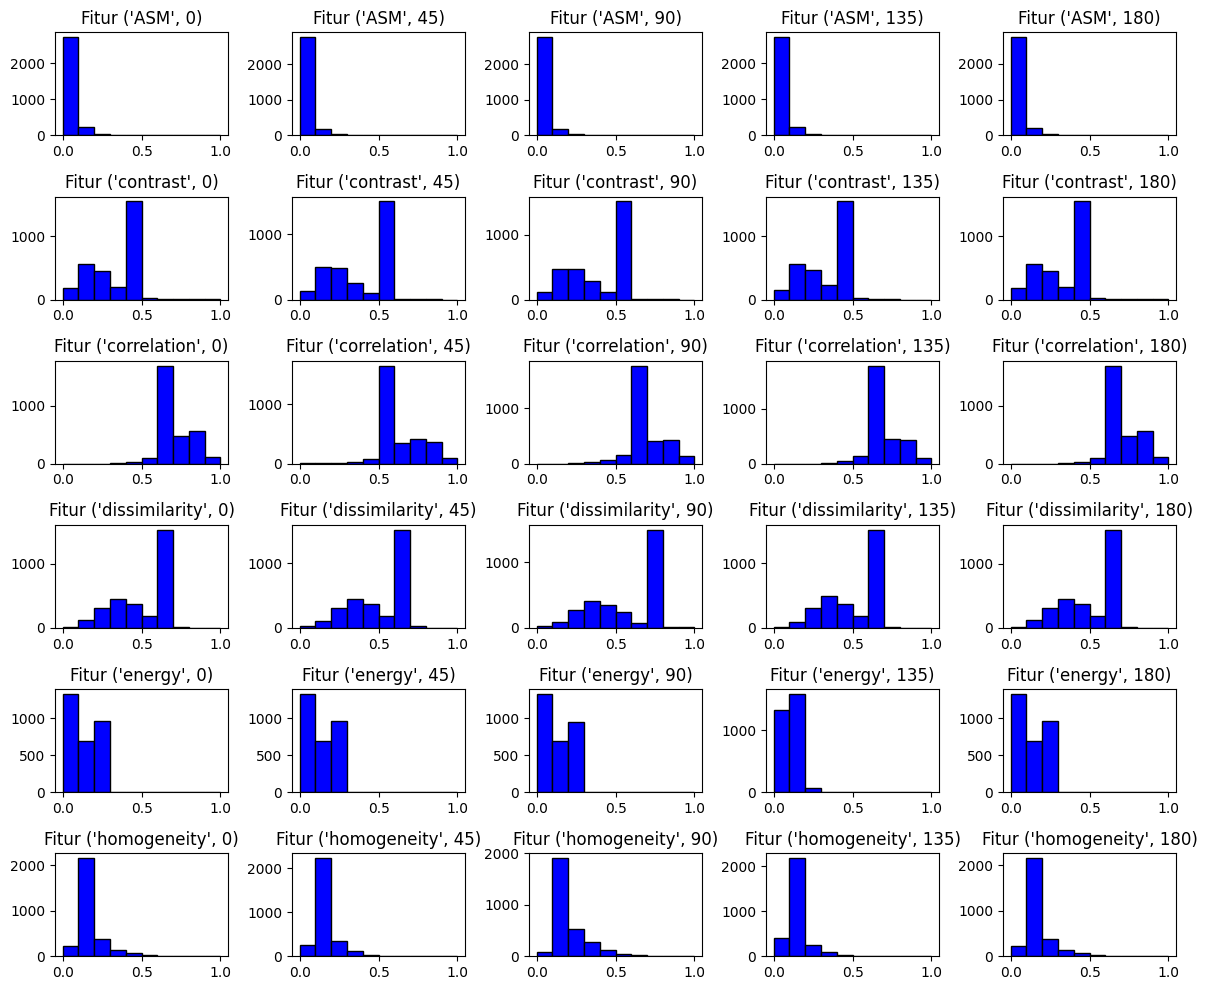

In [311]:
df = np.array(X_scaled)

fig, axs = plt.subplots(6, 5, figsize=(12,10)) #grid 6x5
count = 0
for i in range(6):
    for j in range(5):
        index_feature = i * 5 + j # indeks fitur dalam data
        axs[i, j].hist(df[:, index_feature], bins=10, color='blue', edgecolor='black')
        axs[i, j].set_title('Fitur ' + str(flatenned_table.columns[count]))
        count += 1

# Menampilkan histogram
plt.tight_layout()
plt.show()

Di atas adalah distribusi dari setiap kolom atau fitur. Akan dicoba mengubah sebaran datanya dengan transformasi setiap fiturnya.

<h2>Transformasi dengan akar kuadrat<h2>

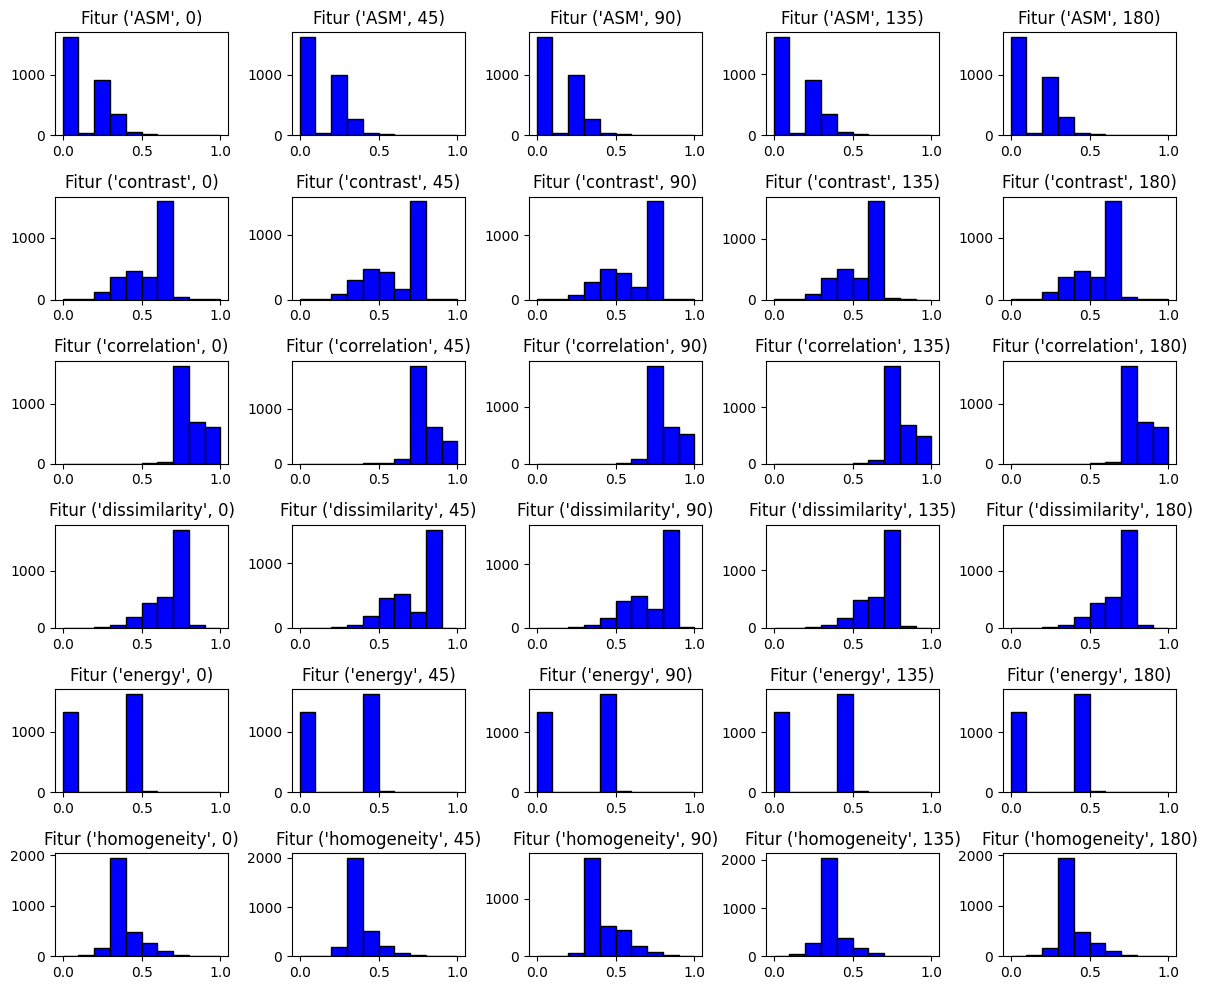

In [312]:
df = np.array(X_scaled)
df = np.sqrt(df)

fig, axs = plt.subplots(6, 5, figsize=(12,10)) #grid 6x5
    
count = 0
for i in range(6):
    for j in range(5):
        index_feature = i * 5 + j # indeks fitur dalam data
        axs[i, j].hist(df[:, index_feature], bins=10, color='blue', edgecolor='black')
        axs[i, j].set_title('Fitur ' + str(flatenned_table.columns[count]))
        count += 1

# Menampilkan histogram
plt.tight_layout()
plt.show()

In [313]:
test = pd.DataFrame(df)
test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.031774,0.031781,0.034762,0.018207,0.019570,0.422470,0.446353,0.475967,0.425507,0.422470,0.849876,0.802019,0.810476,0.830551,0.849876,0.613103,0.606626,0.629441,0.594451,0.613103,0.430595,0.421787,0.440447,0.417597,0.429516,0.420067,0.375286,0.466136,0.386397,0.420067
1,0.026305,0.030689,0.036634,0.056909,0.017248,0.355938,0.371875,0.436563,0.403752,0.355938,0.688407,0.565090,0.487700,0.492805,0.688407,0.466174,0.497226,0.578153,0.539387,0.466174,0.473472,0.476379,0.470953,0.448301,0.472316,0.497436,0.434200,0.487603,0.462451,0.497436
2,0.034962,0.028832,0.040829,0.020240,0.034485,0.325297,0.411971,0.476240,0.396821,0.325297,0.896724,0.788127,0.751449,0.814302,0.896724,0.504540,0.537869,0.599749,0.564731,0.504540,0.439770,0.433266,0.438771,0.425111,0.438675,0.428447,0.405462,0.448135,0.374121,0.428447
3,0.282257,0.032980,0.039643,0.035634,0.036988,0.637418,0.749336,0.835632,0.648279,0.637418,0.794493,0.634548,0.607506,0.759474,0.794493,0.814888,0.842872,0.950407,0.810394,0.814888,0.453562,0.439090,0.448831,0.436417,0.452442,0.246662,0.252511,0.243495,0.233553,0.246662
4,0.308705,0.291355,0.308391,0.303866,0.304970,0.427874,0.435535,0.428743,0.437966,0.427874,0.878442,0.859218,0.882965,0.860445,0.878442,0.509927,0.563209,0.600571,0.554787,0.509927,0.037458,0.042274,0.037779,0.042855,0.452442,0.574626,0.509476,0.578315,0.565590,0.574626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,0.039191,0.032664,0.035281,0.306038,0.290434,0.413276,0.409663,0.353276,0.373753,0.413276,0.861128,0.846337,0.915128,0.882219,0.861128,0.490684,0.487789,0.468315,0.477720,0.490684,0.452826,0.442498,0.449560,0.036068,0.042196,0.567656,0.535347,0.612796,0.515755,0.567656
2994,0.312461,0.290612,0.298075,0.013501,0.021378,0.319073,0.427507,0.475014,0.376511,0.319073,0.937036,0.852040,0.838435,0.896562,0.937036,0.478454,0.603112,0.689999,0.571928,0.478454,0.039105,0.042622,0.449560,0.433057,0.451708,0.495257,0.317401,0.313970,0.324787,0.495257
2995,0.015215,0.015346,0.254658,0.258966,0.270573,0.515219,0.593113,0.565053,0.490978,0.515219,0.861919,0.777449,0.834847,0.867776,0.861919,0.726558,0.767193,0.744014,0.691985,0.726558,0.442623,0.453441,0.036102,0.042519,0.037242,0.225563,0.254012,0.313099,0.214433,0.225563
2996,0.261920,0.254732,0.022800,0.033408,0.024422,0.229570,0.204501,0.183520,0.228822,0.229570,0.902720,0.907266,0.932092,0.895423,0.902720,0.347526,0.309805,0.289377,0.344261,0.347526,0.044204,0.453441,0.435336,0.446480,0.441523,0.719678,0.653137,0.753665,0.681976,0.719678


In [314]:
## Menyiapkan data
# Folder Happy
folder_path_happy = "data/happy"
images_file_happy = os.listdir(folder_path_happy)
images_file_happy.remove("happy-0974.jpg") # image tidak terbaca

# Folder Sad
folder_path_sad = "data/sad"
images_file_sad = os.listdir(folder_path_sad)
images_file_sad.remove("sad-0967.jpg") # image tidak terbaca

df = np.array(X_scaled)

X = df  # Masukkan fitur GLCM di sini
y = np.array([1] * len(images_file_happy) + [0] * len(images_file_sad))  # Label: 1 untuk happy, 0 untuk sad

In [343]:
a = pd.DataFrame(df)
a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.001010,0.001010,0.001208,0.000332,0.000383,0.178481,0.199231,0.226545,0.181056,0.178481,0.722289,0.643234,0.656871,0.689816,0.722289,0.375896,0.367996,0.396196,0.353372,0.375896,0.185412,0.177904,0.193994,0.174387,0.184484,0.176457,0.140839,0.217283,0.149302,0.176457
1,0.000692,0.000942,0.001342,0.003239,0.000297,0.126692,0.138291,0.190587,0.163015,0.126692,0.473904,0.319327,0.237851,0.242857,0.473904,0.217318,0.247234,0.334261,0.290938,0.217318,0.224176,0.226937,0.221797,0.200973,0.223082,0.247443,0.188530,0.237756,0.213861,0.247443
2,0.001222,0.000831,0.001667,0.000410,0.001189,0.105818,0.169720,0.226805,0.157467,0.105818,0.804113,0.621144,0.564675,0.663087,0.804113,0.254560,0.289303,0.359699,0.318922,0.254560,0.193398,0.187719,0.192520,0.180720,0.192436,0.183567,0.164399,0.200825,0.139966,0.183567
3,0.079669,0.001088,0.001572,0.001270,0.001368,0.406302,0.561505,0.698281,0.420266,0.406302,0.631219,0.402651,0.369064,0.576801,0.631219,0.664043,0.710433,0.903273,0.656739,0.664043,0.205718,0.192800,0.201449,0.190460,0.204704,0.060842,0.063762,0.059290,0.054547,0.060842
4,0.095299,0.084888,0.095105,0.092334,0.093007,0.183076,0.189690,0.183821,0.191815,0.183076,0.771661,0.738255,0.779628,0.740366,0.771661,0.260025,0.317205,0.360686,0.307789,0.260025,0.001403,0.001787,0.001427,0.001837,0.204704,0.330195,0.259566,0.334448,0.319892,0.330195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,0.001536,0.001067,0.001245,0.093659,0.084352,0.170797,0.167824,0.124804,0.139692,0.170797,0.741542,0.716286,0.837459,0.778311,0.741542,0.240771,0.237939,0.219319,0.228217,0.240771,0.205052,0.195805,0.202104,0.001301,0.001781,0.322233,0.286596,0.375519,0.266003,0.322233
2994,0.097632,0.084455,0.088849,0.000182,0.000457,0.101808,0.182763,0.225638,0.141760,0.101808,0.878036,0.725971,0.702974,0.803824,0.878036,0.228918,0.363744,0.476099,0.327102,0.228918,0.001529,0.001817,0.202104,0.187538,0.204040,0.245279,0.100744,0.098577,0.105487,0.245279
2995,0.000232,0.000235,0.064851,0.067063,0.073210,0.265450,0.351783,0.319285,0.241060,0.265450,0.742904,0.604427,0.696970,0.753036,0.742904,0.527886,0.588585,0.553557,0.478843,0.527886,0.195915,0.205609,0.001303,0.001808,0.001387,0.050879,0.064522,0.098031,0.045982,0.050879
2996,0.068602,0.064888,0.000520,0.001116,0.000596,0.052703,0.041821,0.033679,0.052360,0.052703,0.814904,0.823131,0.868796,0.801782,0.814904,0.120775,0.095979,0.083739,0.118515,0.120775,0.001954,0.205609,0.189517,0.199345,0.194942,0.517936,0.426587,0.568011,0.465091,0.517936


In [341]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [317]:
# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [318]:
# Membangun model
model = tf.keras.models.Sequential()

# Tuning Hyper Paramater

<h2>Kombinasi 1<h2>

In [320]:
# Menentukan kombinasi hyperparameter
## Kombinasi 1
learning_rate = 0.005
epochs = 50
num_hidden_layers = 2
hidden_neurons = [64, 32]  # Jumlah neuron pada setiap hidden layer
activation_functions = ['relu', 'relu']  # Fungsi aktivasi untuk setiap hidden layer

# Membangun model
model = tf.keras.models.Sequential()

# Hidden layers
for i in range(num_hidden_layers):
    model.add(tf.keras.layers.Dense(hidden_neurons[i], activation=activation_functions[i]))

# Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Mengompilasi model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Melatih model
model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=1)

# Evaluasi model pada set pengujian
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy:', accuracy)

Epoch 1/50
75/75 [==============================] - 3s 5ms/step - loss: 0.6886 - accuracy: 0.5459
Epoch 2/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6836 - accuracy: 0.5617
Epoch 3/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6835 - accuracy: 0.5575
Epoch 4/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6803 - accuracy: 0.5755
Epoch 5/50
75/75 [==============================] - 0s 5ms/step - loss: 0.6782 - accuracy: 0.5771
Epoch 6/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6827 - accuracy: 0.5525
Epoch 7/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6754 - accuracy: 0.5809
Epoch 8/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6703 - accuracy: 0.5926
Epoch 9/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6695 - accuracy: 0.5867
Epoch 10/50
75/75 [==============================] - 0s 5ms/step - loss: 0.6664 - accuracy: 0.5809
Epoch 11/50
75/75 [

In [321]:
# Evaluasi model pada set pengujian
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Konversi prediksi menjadi nilai biner (0 atau 1)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

19/19 [==============================] - 0s 3ms/step
Accuracy: 0.6216666666666667
Precision: 0.6026200873362445
Recall: 0.8598130841121495
F1-Score: 0.7086007702182284


<h2>Kombinasi 2<h2>

In [322]:
# Menentukan kombinasi hyperparameter
## Kombinasi 2
learning_rate = 0.001
epochs = 50
num_hidden_layers = 3
hidden_neurons = [64, 32, 16]  # Jumlah neuron pada setiap hidden layer
activation_functions = ['relu', 'relu', 'relu']  # Fungsi aktivasi untuk setiap hidden layer

# Membangun model
model = tf.keras.models.Sequential()

# Hidden layers
for i in range(num_hidden_layers):
    model.add(tf.keras.layers.Dense(hidden_neurons[i], activation=activation_functions[i]))

# Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Mengompilasi model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Melatih model
model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=1)

# Evaluasi model pada set pengujian
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy:', accuracy)

Epoch 1/50
75/75 [==============================] - 3s 4ms/step - loss: 0.6933 - accuracy: 0.5038
Epoch 2/50
75/75 [==============================] - 0s 5ms/step - loss: 0.6892 - accuracy: 0.5359
Epoch 3/50
75/75 [==============================] - 0s 5ms/step - loss: 0.6840 - accuracy: 0.5659
Epoch 4/50
75/75 [==============================] - 0s 5ms/step - loss: 0.6835 - accuracy: 0.5601
Epoch 5/50
75/75 [==============================] - 0s 5ms/step - loss: 0.6839 - accuracy: 0.5742
Epoch 6/50
75/75 [==============================] - 0s 5ms/step - loss: 0.6826 - accuracy: 0.5696
Epoch 7/50
75/75 [==============================] - 0s 5ms/step - loss: 0.6827 - accuracy: 0.5734
Epoch 8/50
75/75 [==============================] - 0s 5ms/step - loss: 0.6795 - accuracy: 0.5738
Epoch 9/50
75/75 [==============================] - 0s 5ms/step - loss: 0.6784 - accuracy: 0.5713
Epoch 10/50
75/75 [==============================] - 0s 5ms/step - loss: 0.6789 - accuracy: 0.5680
Epoch 11/50
75/75 [

In [323]:
# Evaluasi model pada set pengujian
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Konversi prediksi menjadi nilai biner (0 atau 1)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

19/19 [==============================] - 0s 4ms/step
Accuracy: 0.59
Precision: 0.5935162094763092
Recall: 0.7414330218068536
F1-Score: 0.6592797783933517


<h2>Kombinasi 3 <h2>

In [324]:
# Menentukan kombinasi hyperparameter
## Kombinasi 3
learning_rate = 0.01
epochs = 50
num_hidden_layers = 2
hidden_neurons = [64, 32]  # Jumlah neuron pada setiap hidden layer
activation_functions = ['relu', 'relu']  # Fungsi aktivasi untuk setiap hidden layer

# Membangun model
model = tf.keras.models.Sequential()

# Hidden layers
for i in range(num_hidden_layers):
    model.add(tf.keras.layers.Dense(hidden_neurons[i], activation=activation_functions[i]))

# Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Mengompilasi model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Melatih model
model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=1)

# Evaluasi model pada set pengujian
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy:', accuracy)

Epoch 1/50
75/75 [==============================] - 3s 5ms/step - loss: 0.6933 - accuracy: 0.5521
Epoch 2/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6856 - accuracy: 0.5488
Epoch 3/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6826 - accuracy: 0.5651
Epoch 4/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6820 - accuracy: 0.5696
Epoch 5/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6779 - accuracy: 0.5709
Epoch 6/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6813 - accuracy: 0.5684
Epoch 7/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6766 - accuracy: 0.5759
Epoch 8/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6755 - accuracy: 0.5701
Epoch 9/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6721 - accuracy: 0.5830
Epoch 10/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6647 - accuracy: 0.5880
Epoch 11/50
75/75 [

In [325]:
# Evaluasi model pada set pengujian
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Konversi prediksi menjadi nilai biner (0 atau 1)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

19/19 [==============================] - 0s 3ms/step
Accuracy: 0.6
Precision: 0.5952941176470589
Recall: 0.7881619937694704
F1-Score: 0.67828418230563


In [338]:
a = model.predict(X_test[0:1])
a

1/1 [==============================] - 0s 55ms/step


array([[0.57791406]], dtype=float32)

In [326]:
# Evaluasi model pada set pengujian
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Konversi prediksi menjadi nilai biner (0 atau 1)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

19/19 [==============================] - 0s 4ms/step
Accuracy: 0.6
Precision: 0.5952941176470589
Recall: 0.7881619937694704
F1-Score: 0.67828418230563


<h4>Karena yang terbaik adalah kombinasi 1, maka akan digunakan hyperparameter pada kombinasi 1 untuk pemodelan<h4>

# Pemodelan

In [327]:
# Membangun model
model = tf.keras.models.Sequential()

In [328]:
# Menentukan hyperparameter
learning_rate = 0.005
epochs = 50
num_hidden_layers = 2
hidden_neurons = [64, 32]  # Jumlah neuron pada setiap hidden layer
activation_functions = ['relu', 'relu']  # Fungsi aktivasi untuk setiap hidden layer

# Membangun model
model = tf.keras.models.Sequential()

# Hidden layers
for i in range(num_hidden_layers):
    model.add(tf.keras.layers.Dense(hidden_neurons[i], activation=activation_functions[i]))

# Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Mengompilasi model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Melatih model
model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=1)

# Evaluasi model pada set pengujian
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy:', accuracy)

Epoch 1/50
75/75 [==============================] - 3s 4ms/step - loss: 0.6903 - accuracy: 0.5346
Epoch 2/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6845 - accuracy: 0.5555
Epoch 3/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6883 - accuracy: 0.5425
Epoch 4/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6798 - accuracy: 0.5771
Epoch 5/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6777 - accuracy: 0.5767
Epoch 6/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6744 - accuracy: 0.5838
Epoch 7/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6733 - accuracy: 0.5859
Epoch 8/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6666 - accuracy: 0.6030
Epoch 9/50
75/75 [==============================] - 0s 5ms/step - loss: 0.6663 - accuracy: 0.5930
Epoch 10/50
75/75 [==============================] - 0s 4ms/step - loss: 0.6690 - accuracy: 0.5876
Epoch 11/50
75/75 [

# Evaluate Model

In [329]:
# Evaluasi model pada set pengujian
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Konversi prediksi menjadi nilai biner (0 atau 1)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)


19/19 [==============================] - 0s 4ms/step
Accuracy: 0.6333333333333333
Precision: 0.6090712742980562
Recall: 0.8785046728971962
F1-Score: 0.7193877551020408


<h4>Di atas hasil metrik dari keseluruhan data evaluasi<h4>

Sekarang akan dicobaa pada masing-masing data sad dan  happy

In [330]:
data_happy_sad = pd.DataFrame(df)

In [331]:
happy = data_happy_sad[0:1536]
sad = data_happy_sad[1536::]

In [332]:
y_pred_happy = model.predict(happy)
y_pred_happy_binary = (y_pred_happy > 0.55).astype(int)  # Konversi prediksi menjadi nilai biner (0 atau 1)

accuracy = accuracy_score(y[0:1536], y_pred_happy_binary)
precision = precision_score(y[0:1536], y_pred_happy_binary)
recall = recall_score(y[0:1536], y_pred_happy_binary)
f1 = f1_score(y[0:1536], y_pred_happy_binary)

print('All happy Accuracy:', accuracy)
print('All happy Precision:', precision)
print('All happy Recall:', recall)
print('All happy F1-Score:', f1)

48/48 [==============================] - 0s 3ms/step
All happy Accuracy: 0.7884114583333334
All happy Precision: 1.0
All happy Recall: 0.7884114583333334
All happy F1-Score: 0.8816891153986166


In [333]:
y_pred_sad = model.predict(sad)
y_pred_sad_binary = (y_pred_sad > 0.55).astype(int)  # Konversi prediksi menjadi nilai biner (0 atau 1)

accuracy = accuracy_score(y[1536::], y_pred_sad_binary)
precision = precision_score(y[1536::], y_pred_sad_binary)
recall = recall_score(y[1536::], y_pred_sad_binary)
f1 = f1_score(y[1536::], y_pred_sad_binary)

print('All sad Accuracy:', accuracy)
print('All sad Precision:', precision)
print('All sad Recall:', recall)
print('All sad F1-Score:', f1)

46/46 [==============================] - 0s 3ms/step
All sad Accuracy: 0.40902872777017785
All sad Precision: 0.0
All sad Recall: 0.0
All sad F1-Score: 0.0


c:\Users\hp\OneDrive\Documents\Belajar Pemrograman\finalprojectppdm\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [334]:
model.save('model.h5')

In [335]:
model.summary()

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_260 (Dense)           (None, 64)                1984      
                                                                 
 dense_261 (Dense)           (None, 32)                2080      
                                                                 
 dense_262 (Dense)           (None, 1)                 33        
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________
